In [2]:
import numpy as np
from astropy import units as u
from astropy.coordinates import Angle
import os 
import folium
from folium import plugins
import IFR_subroutines as subs
import importlib as imp
import matplotlib.pyplot as plt

In [3]:
##########################
# Files used:
##########################
#potential_good = '../../albus/libdata/JMA/gps_pos_default_v2.snx'
#potential_bad = '../../ALBUS_ionosphere-master/stations_removed.snx'
#potential_try = '../../IFR_tests/NCP_Feb_15_2021_6day_100km_20min/potential_stations'
#actual_good = '../../IFR_tests/NCP_Feb_15_2021_6day_100km_20min/albus_good_stations'

#potential_good = '../../albus/libdata/JMA/gps_pos_default_v2.snx'
#potential_bad = '../../ALBUS_ionosphere-master/stations_removed.snx'
#potential_try = '../../ALBUS_ionosphere-master/potential_stations_within500km'
#actual_good = '../../IFR_tests/NCP_Feb_15_2021_3day_500km_20min/albus_good_stations'

potential_good = '../../albus/libdata/JMA/gps_pos_default_v2.snx'
potential_bad = '../../ALBUS_ionosphere-master/stations_removed.snx'
potential_try = '../../ALBUS_ionosphere-master/potential_stations_within500km'
actual_good = '../../IFR_tests/NCP_Feb_15_2021_3day_500km_20min/albus_good_stations'

ALBUS_data1 = '../../ALBUS_ionosphere-master/examples/albus_report_parallel_RI_G03_NCP_Feb_15_2021_3day_500km_20min'
ALBUS_data2 = '../../ALBUS_ionosphere-master/examples/albus_report_serial_RI_G03_NCP_Feb_15_2021_1day_500km_20min'
ALBUS_data3 = '../../ALBUS_ionosphere-master/examples/albus_report_serial_RI_G03_NCP_Feb_15_2021_1day_500km_60min'
ALBUS_data4 = '../../ALBUS_ionosphere-master/examples/albus_report_parallel_RI_G03_NCP_Feb_15_2021_3day_200km_20min'
ALBUS_data5 = '../../ALBUS_ionosphere-master/examples/albus_report_serial_RI_G03_NCP_Feb_15_2021_1day_200km_20min'

Read in all the station data files:

In [4]:
imp.reload(subs)

all_stn, all_lon, all_lat = subs.read_master_station_list(potential_good)
print('Number of stations in master list: ',len(all_stn))
#for i in range(0,len(all_stn)):
#    print(all_stn[i],all_lon[i],all_lat[i])

excl_stn, excl_lon, excl_lat = subs.read_stations_excluded_from_master(potential_bad)
print('Number of bad stations excluded from master list: ',len(excl_stn))
print(excl_stn)

good_stn, good_lon, good_lat = subs.read_stations_used(actual_good,all_stn,all_lon,all_lat)
print('Number of stations used by ALBUS: ',len(good_stn))

bad_stn, bad_lon, bad_lat = subs.read_stations_failed(potential_try,good_stn,all_stn,all_lon,all_lat,excl_stn)
print('Number of stations failed in ALBUS: ',len(bad_stn))
print(bad_stn)

Number of stations in master list:  830
Number of bad stations excluded from master list:  51
['dwh1' 'lind' 'sach' 'sach' 'ucal' 'wslr' 'myra' 'cpud' 'cstl' 'sc03'
 'brn3' 'seqm' 'webg' 'bpkt' 'ccpw' 'jobo' 'lcrs' 'mlke' 'twsp' 'bces'
 'chst' 'cblv' 'odsa' 'chlw' 'p689' 'culm' 'rmsn' 'p442' 'vcwx' 'skgt'
 'ghcl' 'rdtp' 'yaks' 'p694' 'jkpr' 'roky' 'danp' 'bldg' 'skco' 'blyn'
 'bbay' 'pnnl' 'farw' 'pfld' 'vrnt' 'coug' 'cwak' 'rich' 'vern' 'xane'
 'p403']
Number of stations used by ALBUS:  86
Number of stations failed in ALBUS:  23
['tfno' 'p692' 'pabh' 'p401' 'p429' 'p417' 'p423' 'p024' 'p446' 'p415'
 'enum' 'tumw' 'ufda' 'yaki' 'arln' 'cncr' 'p402' 'p414' 'p444' 'sc02'
 'tdls' 'vcwa' 'wala']


In [6]:
m = folium.Map(location=[49.3, -119.6],tiles="Stamen Terrain",zoom_start=5)
all_pts = len(all_lon)
good_pts = len(good_lon)
bad_pts = len(bad_lon)
excl_pts = len(excl_lon)
#for i in range(0,all_pts):
#    folium.Marker(location=[all_lat[i],all_lon[i]],popup=all_stn[i],
#                       icon=folium.Icon(icon='glyphicon-map-marker',color='white')).add_to(m)
for i in range(0,excl_pts):
    folium.Marker(location=[excl_lat[i],excl_lon[i]],popup=excl_stn[i],
                       icon=folium.Icon(icon='glyphicon-ban-circle',color='darkpurple')).add_to(m)
for i in range(0,bad_pts):
    folium.Marker(location=[bad_lat[i],bad_lon[i]],popup=bad_stn[i],
                       icon=folium.Icon(icon='glyphicon-remove-circle',color='red')).add_to(m)
for i in range(0,good_pts):
    folium.Marker(location=[good_lat[i],good_lon[i]],popup=good_stn[i], 
                       icon=folium.Icon(icon='glyphicon-ok-circle',color='blue')).add_to(m)
m

In [5]:
imp.reload(subs)

TEC1, STEC1, RM1, t_hrs1 = subs.read_in_fitted_models(ALBUS_data1)
TEC2, STEC2, RM2, t_hrs2 = subs.read_in_fitted_models(ALBUS_data2)
TEC3, STEC3, RM3, t_hrs3 = subs.read_in_fitted_models(ALBUS_data3)
TEC4, STEC4, RM4, t_hrs4 = subs.read_in_fitted_models(ALBUS_data4)
TEC5, STEC5, RM5, t_hrs5 = subs.read_in_fitted_models(ALBUS_data5)

246
'seq  rel_time time_width El         Az         STEC           RM (rad/m2)   VTEC factor   STEC_error\n'
['reference', 'time', 'for', 'rel_time=0:', 'year,month,day,hr,min,sec', '2021', '2', '15', '0', '0', '0.0']

102
'seq  rel_time time_width El         Az         STEC           RM (rad/m2)   VTEC factor   STEC_error\n'
['reference', 'time', 'for', 'rel_time=0:', 'year,month,day,hr,min,sec', '2021', '2', '15', '0', '0', '0.0']

54
'seq  rel_time time_width El         Az         STEC           RM (rad/m2)   VTEC factor   STEC_error\n'
['reference', 'time', 'for', 'rel_time=0:', 'year,month,day,hr,min,sec', '2021', '2', '15', '0', '0', '0.0']

246
'seq  rel_time time_width El         Az         STEC           RM (rad/m2)   VTEC factor   STEC_error\n'
['reference', 'time', 'for', 'rel_time=0:', 'year,month,day,hr,min,sec', '2021', '2', '15', '0', '0', '0.0']

102
'seq  rel_time time_width El         Az         STEC           RM (rad/m2)   VTEC factor   STEC_error\n'
['reference', 't

([<matplotlib.axis.XTick at 0x14a0bf2b8df0>,
 [Text(-6, 0, '18:00'),
  Text(0, 0, '00:00'),
  Text(6, 0, '6:00'),
  Text(12, 0, '12:00'),
  Text(18, 0, '18:00'),
  Text(24, 0, '00:00'),
  Text(30, 0, '6:00'),
  Text(36, 0, '12:00'),
  Text(42, 0, '18:00'),
  Text(48, 0, '00:00'),
  Text(54, 0, '6:00'),
  Text(60, 0, '12:00')])

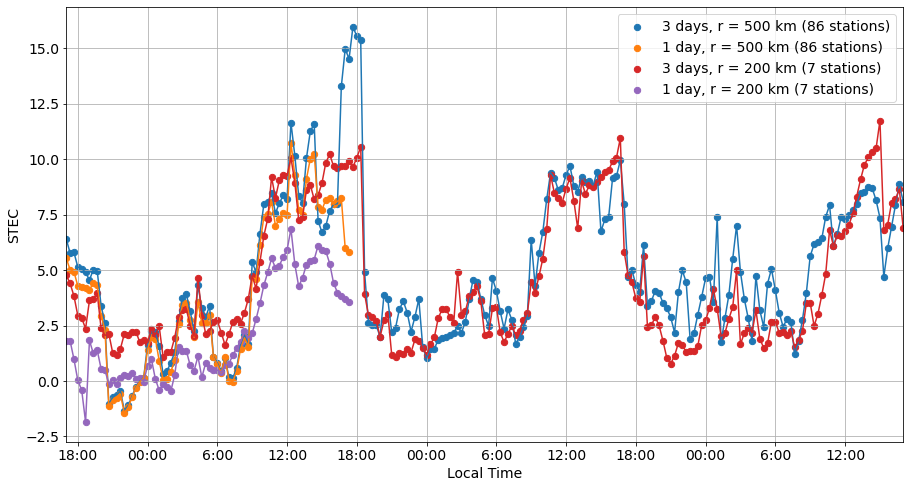

In [21]:
fs = 14

fig = plt.figure(figsize=(15,8))    

plt.scatter(t_hrs1,TEC1,s=40,color='C0',label='3 days, r = 500 km (86 stations)')
plt.scatter(t_hrs2,TEC2,s=40,color='C1',label='1 day, r = 500 km (86 stations)')
#plt.scatter(t_hrs3,TEC3,s=20,color='C2',label='1 day, 60 min, 500 km')
plt.scatter(t_hrs4,TEC4,s=40,color='C3',label='3 days, r = 200 km (7 stations)')
plt.scatter(t_hrs5,TEC5,s=40,color='C4',label='1 day, r = 200 km (7 stations)')

plt.plot(t_hrs1,TEC1,color='C0')
plt.plot(t_hrs2,TEC2,color='C1')
#plt.plot(t_hrs3,TEC3,color='C2')
plt.plot(t_hrs4,TEC4,color='C3')
plt.plot(t_hrs5,TEC5,color='C4')

plt.xlim(-7,65)
plt.grid()
plt.legend(fontsize=fs)
#plt.xlim(0,48)
plt.xlabel('Local Time',fontsize=fs)
plt.ylabel('STEC',fontsize=fs)
plt.yticks(fontsize=fs)
#plt.title('February 15 to 16, 2021')
plt.xticks(ticks=[-6,0,6,12,18,24,30,36,42,48,54,60], 
           labels=['18:00','00:00','6:00','12:00','18:00','00:00','6:00','12:00','18:00','00:00','6:00','12:00'],
           fontsize=fs)

([<matplotlib.axis.XTick at 0x14a0bef2e670>,
 [Text(-6, 0, '18:00'),
  Text(0, 0, '00:00'),
  Text(6, 0, '6:00'),
  Text(12, 0, '12:00')])

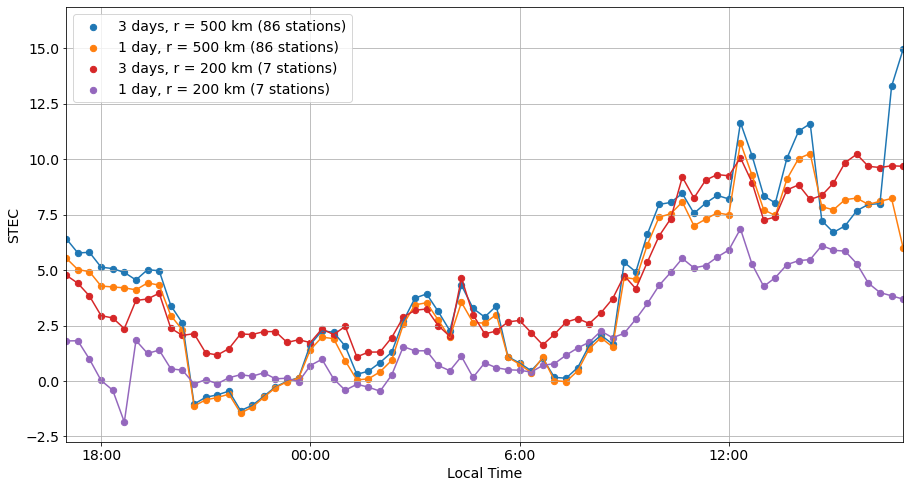

In [22]:
fs = 14

fig = plt.figure(figsize=(15,8))    

plt.scatter(t_hrs1,TEC1,s=40,color='C0',label='3 days, r = 500 km (86 stations)')
plt.scatter(t_hrs2,TEC2,s=40,color='C1',label='1 day, r = 500 km (86 stations)')
#plt.scatter(t_hrs3,TEC3,s=20,color='C2',label='1 day, 60 min, 500 km')
plt.scatter(t_hrs4,TEC4,s=40,color='C3',label='3 days, r = 200 km (7 stations)')
plt.scatter(t_hrs5,TEC5,s=40,color='C4',label='1 day, r = 200 km (7 stations)')

plt.plot(t_hrs1,TEC1,color='C0')
plt.plot(t_hrs2,TEC2,color='C1')
#plt.plot(t_hrs3,TEC3,color='C2')
plt.plot(t_hrs4,TEC4,color='C3')
plt.plot(t_hrs5,TEC5,color='C4')

plt.xlim(-7,17)
plt.grid()
plt.legend(fontsize=fs)
#plt.xlim(0,48)
plt.xlabel('Local Time',fontsize=fs)
plt.ylabel('STEC',fontsize=fs)
plt.yticks(fontsize=fs)
#plt.title('February 15 to 16, 2021')
plt.xticks(ticks=[-6,0,6,12], 
           labels=['18:00','00:00','6:00','12:00'],
           fontsize=fs)